In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/sample_data/

/content/drive/MyDrive/sample_data


In [5]:
df = pd.read_csv('disengagement_2019.csv')

In [6]:
df.head()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
0,AImotive Inc.,AVT003,12.06.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
1,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
2,AImotive Inc.,AVT003,12.10.2018,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
3,AImotive Inc.,AVT003,04.23.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
4,AImotive Inc.,AVT003,05.14.2019,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...


In [7]:
df.rename(columns = 
          {'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)' : 'self_operate', 
           'DRIVER PRESENT\n(Yes or No)' : 'driver_present',
           'DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)': 'initiated_by',
           'DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)': 'location',
           'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT': 'cause',
           'VIN NUMBER': 'vehicle_id',
           'Permit Number': 'permit_id',
           'Manufacturer': 'manufacturer'
           }, 
          inplace = True)

In [8]:
#target = cause of disengagement
df['cause']

0       Lane change maneuver: risk of lane departure, ...
1       Lane change maneuver: risk of lane departure, ...
2       Lane change maneuver: risk of lane departure, ...
3       Lane change maneuver: risk of lane departure, ...
4       Lane change maneuver to the exit lane: risk of...
                              ...                        
8880    Planning discrepancy; incorrect system estimat...
8881    Planning discrepancy; incorrect system estimat...
8882    Prediction discrepancy; incorrect trajectory e...
8883    Prediction discrepancy; incorrect trajectory e...
8884    Planning discrepancy; system planned incorrect...
Name: cause, Length: 8885, dtype: object

In [9]:
df['cause'].nunique()

469

In [10]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 21.9 MB 140 kB/s
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 102 kB 48.7 MB/s 
     |████████████████████████████████| 690 kB 38.7 MB/s 
     |████████████████████████████████| 4.7 MB 56.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 50.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=a2ac0a32254c50c69eb4e80db0a84bbc09e188e737279cbb15ce64d50be6eda2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ybnozt2l/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=295f8a80c0c7146645bdf317ea2621407c5f1d636dc577f007654ce5ee7fe9cd
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [11]:
from pandas_profiling import ProfileReport

In [12]:
df.duplicated().sum()

2978

In [13]:
#결측치, 중복값 제거
df_clean = df.drop_duplicates().dropna()    

In [14]:
df_clean.shape

(5906, 9)

In [15]:
profile = ProfileReport(df_clean, title="Pandas Profiling Report")

In [16]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
pip install python-dateutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from dateutil.parser import parse

In [19]:
#string to datetime
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%-m/%-d/%Y','%Y-%m-%d', '%d.%m.%Y', '%m.%d.%Y', '%d/%m/%Y', '%d/%m/%y', '%m/%d/%Y', '%m/%d/%y', '%d/%m/%y %H:%M:%S', '%m/%d.%Y', 
                '%Y-%m-%d %H:%M:%S', '%Y%m%d', '%y%m%d', '%B %-d,%Y', '%b %-d %Y', '%-d/%b/%y', '%d/%b/%y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [20]:
drop_index = df_clean[(df_clean['manufacturer']=='AutoX Technologies, Inc.')|(df_clean['manufacturer']=='Phantom AI, Inc. ')
                        |(df_clean['manufacturer']=='SAIC Innovation Center')].index

In [21]:
df_clean = df_clean.drop(drop_index)

In [22]:
df_clean['DATE'] = df_clean['DATE'].map(lambda iterator: parse(iterator))

In [23]:
df_clean.dtypes

manufacturer              object
permit_id                 object
DATE              datetime64[ns]
vehicle_id                object
self_operate              object
driver_present            object
initiated_by              object
location                  object
cause                     object
dtype: object

In [24]:
df_clean.head()

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause
0,AImotive Inc.,AVT003,2018-12-06,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
1,AImotive Inc.,AVT003,2018-12-10,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
3,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ..."
4,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...
7,AImotive Inc.,AVT003,2019-05-15,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver: risk to be rear-ended by...


In [25]:
df_clean['cause'].nunique()

413

In [26]:
import numpy as np

In [27]:
df_clean['cause_corr'] = np.nan

In [28]:
df_clean

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause,cause_corr
0,AImotive Inc.,AVT003,2018-12-06,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN
1,AImotive Inc.,AVT003,2018-12-10,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN
3,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN
4,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,NaN
7,AImotive Inc.,AVT003,2019-05-15,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver: risk to be rear-ended by...,NaN
...,...,...,...,...,...,...,...,...,...,...
8880,"Zoox, Inc",AVT012,2019-10-29,~6607,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,NaN
8881,"Zoox, Inc",AVT012,2019-11-03,~6839,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,NaN
8882,"Zoox, Inc",AVT012,2019-11-18,~7625,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,NaN
8883,"Zoox, Inc",AVT012,2019-11-20,~5424,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,NaN


In [29]:
#cause 분류

#perception (mapping included)
df_clean.loc[df_clean['cause'].str.contains('perception', case=False),'cause_corr'] = 'perception'
df_clean.loc[df_clean['cause'].str.contains('mapping', case=False),'cause_corr'] = 'perception'
df_clean.loc[df_clean['cause'].str.contains('localization', case=False),'cause_corr'] = 'perception'
df_clean.loc[df_clean['cause'].str.contains('sensor', case=False),'cause_corr'] = 'perception'

#prediction
df_clean.loc[df_clean['cause'].str.contains('prediction', case=False),'cause_corr'] = 'prediction'

#planning
df_clean.loc[df_clean['cause'].str.contains('planner', case=False),'cause_corr'] = 'planning'
df_clean.loc[df_clean['cause'].str.contains('planning', case=False),'cause_corr'] = 'planning'

#control
df_clean.loc[df_clean['cause'].str.contains('controller', case=False),'cause_corr'] = 'control'
df_clean.loc[df_clean['cause'].str.contains('unwanted maneuver', case=False),'cause_corr'] = 'control'


In [30]:
#control

for sentence in ['precautionary takeover to address planning, precautionary takeover to address controls, AV made unsuccessful left turn'
, 'Disengage for unwanted maneuver of the vehicle caused by a control discrepancy in delivering the planned trajectory to the vehicle?s controls system'
, 'Quality of generated trajectory did not meet expectation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Driver performed steering maneuver because the vehicle didn?t drive on the expected path. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Driver pressed the accelerator pedal because the vehicle was driving slower than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Driver pressed the accelerator pedal because the vehicle was driving slower than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Quality of generated trajectory did not meet expectation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Driver pressed the brake pedal because the vehicle was driving faster than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Driver pressed the brake pedal because the vehicle was driving faster than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Invalid control unit operation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Driver performed steering maneuver because the vehicle didn?t drive on the expected path. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Invalid control unit operation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Driver performed steering maneuver because the vehicle didn?t drive on the expected path. Vehicle passing through an active contruction zone Emergency vehicles or collisions present in the vicinity Weather and/or road conditions dry in the area.'
, 'An issue with motion control system caused the system to disengage. This was accomplished by pressing the brake pedal to reduce the velocity of the vehicle.'
, 'An issue with motion control system caused the system to disengage. Driver pressed the brake pedal because the vehicle was driving faster than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'An issue with motion control system caused the system to disengage. Driver pressed the accelerator pedal because the vehicle was driving slower than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'An issue with motion control system caused the system to disengage. The system asked the operator to take control of the vehicle. This was achieved by pressing the accelerator pedal to increase velocity of the vehicle.'
, 'The component "motion control" could not initialize correctly, causing the system to disengage. Driver performed steering maneuver because the vehicle didn?t drive on the expected path. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'The component "motion control" could not initialize correctly, causing the system to disengage. Driver pressed the accelerator pedal because the vehicle was driving slower than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'AV was speeding up incorrectly. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was exhibiting irregular steering behavior. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was braking incorrectly. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was steering and speeding up incorrectly. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was exhibiting irregular steering behavior on a straight road. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was slowing down incorrectly. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was not braking at an intersection when the traffic light was red. As a result, the driver safely disengaged and resumed manual control.'
, 'AV began an undesired passing maneuver on the left. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was steering left incorrectly. As a result, the driver safely disengaged and resumed manual control.'
, 'AV controller software module was not steering enough to make a turn. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was not braking correctly at a traffic light intersection. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was not speeding up correctly at a traffic light intersection. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was braking incorrectly at traffic light intersection. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was braking incorrectly at intersection. As a result, the driver safely disengaged and resumed manual control.'
, 'AV was not braking at intersection. As a result, the driver safely disengaged and resumed manual control.'
, 'AV moving too slowly for traffic position, driver manually accelarated for the AV. As a result, the driver safely disengaged and resumed manual control.'
, 'AV not slowing down enough for traffic position, driver manually braked for the AV. As a result, the driver safely disengaged and resumed manual control.'
, 'AV not turning enough for right turn, driver manually steered for the AV. As a result, the driver safely disengaged and resumed manual control.'
, 'AV not slowing down enough for traffic location, driver manually braked for the AV. As a result, the driver safely disengaged and resumed manual control.'
, 'AV moving to slowly for traffic location, driver manually accelerated for the AV. As a result, the driver safely disengaged and resumed manual control.'
, 'Disengage for unwanted maneuver, off centerline of lanemark'
, 'Lane change maneuver: risk of lane departure, caused by wrong lane association',
'Merge maneuver: risk to rear-end other vehicle, caused by wrong lane association',
'Lane change maneuver: risk to rear-end other vehicle, caused by wrong lane association'
]:
    df_clean.loc[df_clean['cause'].str.contains(sentence),'cause_corr'] = 'control'


In [31]:
#perception

for sentence in ['Perception Module Failure due to software issue'
, 'precautionary takeover to address planning, precautionary takeover to address perception, AV made unsuccessful left turn'
, 'Error in perception system detection due to weather conditions'
, 'Poor traffic light perception accuracy due to weather conditions / fog'
, 'Error in perception system detection'
, 'Disengage for a perception discrepancy for which a component of the vehicle?s perception system failed to detect an object correctly'
, 'Camera vision impeded by sun. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Invalid sensor fusion operation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Traffic light software module was not working properly, intermittent failutre. As a result, the driver safely disengaged and resumed manual control.'
, "Traffic Light Software Module didn't detect traffic light and AV wasn't stopping for red light. As a result, the driver safely disengaged and resumed manual control."
, "The AV didn't detect the obstacle in front of it. As a result, the driver safely disengaged and resumed manual control."
, "Traffic light software module didn't detect traffic light and AV wasn't stopping for red light. As a result, the driver safely disengaged and resumed manual control."
, 'Disengage for Sensor Fusion discrepancy, undesired braking when following a truck'
, "Disengage for perception discrepancy, didn't recognize the pedestrain crossing the road very well "
, 'Invalid map processing operation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Invalid map processing operation. Vehicle passing through an active contruction zone Emergency vehicles or collisions present in the vicinity Weather and/or road conditions dry in the area.'
, 'Invalid map processing operation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
]:
    df_clean.loc[df_clean['cause'].str.contains(sentence),'cause_corr'] = 'perception'

In [32]:
for sentence in ['Localization accuracy fell below safety threshold due to weather conditions'
, 'Disengage for unwanted maneuver of the vehicle caused by a localization discrepancy in accurately positioning the vehicle on the map'
, 'Gps localization is incorrect, lane off-set to large, AV was driving towards edge of the lane. As a result, the driver safely disengaged and resumed manual control.'
, 'Gps localization is incorrect, AV was driving towards the edge of the lane. As a result, the driver safely disengaged and resumed manual control.'
, 'Gps localization was incorrect, AV was driving towards the edge of the lane. As a result, the driver safely disengaged and resumed manual control.'
, 'Gps localization is incorrect, AV had a poor lane position. As a result, the driver safely disengaged and resumed manual control.'
]:
    df_clean.loc[df_clean['cause'].str.contains(sentence),'cause_corr'] = 'perception'

In [33]:
#planning

for sentence in ['Planning Module Failure due to mapping issue'
, 'Motion planning timed out'
, 'precautionary takeover to address planning'
, 'Undesired motion planning behavior'
, 'Disengage for unwanted maneuver of the vehicle caused by a planning discrepancy while generating an appropriate trajectory'
, 'System generation of vehicle trajectory took longer than expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'System could not generate vehicle trajectory. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'Quality of generated trajectory did not meet the system?s expectation. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.'
, 'System could not generate vehicle trajectory. Vehicle passing through an active contruction zone Emergency vehicles or collisions present in the vicinity Weather and/or road conditions dry in the area.'
, 'System generation of vehicle trajectory took longer than expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions wet in the area.'
, 'Speed control Software module generated a wrong speed control command. As a result, the driver safely disengaged and resumed manual control.'
, 'AV main computer froze, no computation was being completed. AV was driving towards edge of the lane. As a result, the driver safely disengaged and resumed manual control.'
, 'Disengage for undesired motion planning behavior, undesired lateral avoiding when driving in traffic jam'
, "Disengage for undesired motion planning behavior, when following a vehicle, didn't slow down in time"                 
]:
    df_clean.loc[df_clean['cause'].str.contains(sentence),'cause_corr'] = 'planning'

In [34]:
df_clean['cause_corr'].unique()

array([nan, 'planning', 'control', 'perception', 'prediction'],
      dtype=object)

In [35]:
#element data column 새로 만들기 (TMAX, TMIN, Precipitation)

In [36]:
# wthr = pd.read_csv('2019.csv')

In [37]:
# sf_wthr = wthr[wthr['AE000041196'] == 'USW00023272']

In [38]:
# sf_wthr.rename(columns = 
#           {'AE000041196' : 'station_number', 
#            '20190101': 'date',
#            'TMAX': 'element',
#            '269': 'element_value',
#            'Unnamed: 4': 'measurement_flag',
#            'Unnamed: 5': 'measurement_quality_flag',
#            'S': 'source',
#            'Unnamed: 7': 'observed_time'
#            }, 
#           inplace = True)

In [39]:
# sf_wthr['date'] = pd.to_datetime(sf_wthr['date'], format="%Y%m%d")

In [40]:
# whtr2 = pd.read_csv('2018.csv')

In [41]:
# sf_wthr_2 = whtr2[whtr2['AE000041196'] == 'USW00023272']

In [42]:
# sf_wthr_2.rename(columns = 
#           {'AE000041196' : 'station_number', 
#            '20180101': 'date',
#            'TMAX': 'element',
#            '259': 'element_value',
#            'Unnamed: 4': 'measurement_flag',
#            'Unnamed: 5': 'measurement_quality_flag',
#            'S': 'source',
#            'Unnamed: 7': 'observed_time'
#            }, 
#           inplace = True)

In [43]:
# sf_wthr_2['date'] = pd.to_datetime(sf_wthr_2['date'], format="%Y%m%d")

In [44]:
# weather = pd.concat([sf_wthr_2, sf_wthr])

In [45]:
# weather.to_csv('weather.csv')

In [46]:
weather = pd.read_csv('weather.csv')

In [47]:
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

In [48]:
max_temp = weather[weather['element'] == 'TMAX']

In [49]:
weather.dtypes

Unnamed: 0                           int64
station_number                      object
date                        datetime64[ns]
element                             object
element_value                        int64
measurement_flag                   float64
measurement_quality_flag           float64
source                              object
observed_time                      float64
dtype: object

In [50]:
#datetime에서 time 없애기
df_clean['DATE'] = pd.to_datetime(df_clean['DATE']).dt.date
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'])

In [51]:
df_clean.dtypes

manufacturer              object
permit_id                 object
DATE              datetime64[ns]
vehicle_id                object
self_operate              object
driver_present            object
initiated_by              object
location                  object
cause                     object
cause_corr                object
dtype: object

In [52]:
#원본 데이터에 날씨 정보 추가하기
#maxtemp

df_new = pd.merge(df_clean,max_temp[['date','element_value']], how='left', left_on = 'DATE', right_on='date')
df_new.rename(columns = {'element_value' : 'max_temperature'}, inplace = True)
df_new.drop(columns = 'date', inplace = True)

In [53]:
df_new

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause,cause_corr,max_temperature
0,AImotive Inc.,AVT003,2018-12-06,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN,156
1,AImotive Inc.,AVT003,2018-12-10,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN,139
2,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",planning,278
3,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,planning,161
4,AImotive Inc.,AVT003,2019-05-15,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver: risk to be rear-ended by...,NaN,172
...,...,...,...,...,...,...,...,...,...,...,...
5821,"Zoox, Inc",AVT012,2019-10-29,~6607,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,planning,211
5822,"Zoox, Inc",AVT012,2019-11-03,~6839,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,planning,244
5823,"Zoox, Inc",AVT012,2019-11-18,~7625,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,prediction,233
5824,"Zoox, Inc",AVT012,2019-11-20,~5424,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,prediction,189


In [54]:
#mintemp

min_temp = weather[weather['element'] == 'TMIN']
df_new = pd.merge(df_new,min_temp[['date','element_value']], how='left', left_on = 'DATE', right_on='date')
df_new.rename(columns = {'element_value' : 'min_temperature'}, inplace=True)


In [55]:
df_new.drop(columns = 'date', inplace = True)

In [56]:
#precipitation (강수량)

prcp = weather[weather['element'] == 'PRCP']
prcp

,Unnamed: 0,station_number,date,element,element_value,measurement_flag,measurement_quality_flag,source,observed_time
2,94974,USW00023272,2018-01-01,PRCP,0,NaN,NaN,W,2400.0
5,197544,USW00023272,2018-01-02,PRCP,0,NaN,NaN,W,2400.0
8,299946,USW00023272,2018-01-03,PRCP,23,NaN,NaN,W,2400.0
11,403332,USW00023272,2018-01-04,PRCP,15,NaN,NaN,W,2400.0
14,506147,USW00023272,2018-01-05,PRCP,66,NaN,NaN,W,2400.0
...,...,...,...,...,...,...,...,...,...
2236,35543730,USW00023272,2019-12-27,PRCP,0,NaN,NaN,W,2400.0
2239,35641180,USW00023272,2019-12-28,PRCP,0,NaN,NaN,W,2400.0
2242,35737872,USW00023272,2019-12-29,PRCP,130,NaN,NaN,W,2400.0
2245,35836316,USW00023272,2019-12-30,PRCP,3,NaN,NaN,W,2400.0


In [57]:
df_new = pd.merge(df_new, prcp[['date','element_value']], how='left', left_on = 'DATE', right_on='date')
df_new.rename(columns = {'element_value' : 'precipitation'}, inplace = True)
df_new.drop(columns = 'date', inplace = True)

In [58]:
df_new

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause,cause_corr,max_temperature,min_temperature,precipitation
0,AImotive Inc.,AVT003,2018-12-06,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN,156,111,0
1,AImotive Inc.,AVT003,2018-12-10,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",NaN,139,94,3
2,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,"Lane change maneuver: risk of lane departure, ...",planning,278,122,0
3,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver to the exit lane: risk of...,planning,161,122,0
4,AImotive Inc.,AVT003,2019-05-15,JTDKN3DU5A1092792,No,Yes,Test Driver,Freeway,Lane change maneuver: risk to be rear-ended by...,NaN,172,117,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,"Zoox, Inc",AVT012,2019-10-29,~6607,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,planning,211,100,0
5822,"Zoox, Inc",AVT012,2019-11-03,~6839,N,Y,Test Driver,Street,Planning discrepancy; incorrect system estimat...,planning,244,111,0
5823,"Zoox, Inc",AVT012,2019-11-18,~7625,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,prediction,233,128,0
5824,"Zoox, Inc",AVT012,2019-11-20,~5424,N,Y,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...,prediction,189,111,0


In [59]:
data = df_new.copy()

In [60]:
data.shape

(5826, 13)

In [61]:
unsorted = data[data['cause_corr'].isnull()]

In [62]:
unsorted.cause.nunique()

100

In [63]:
#cause 분류

#control(2)
data.loc[data['cause'].str.contains('control performance', case=False), 'cause_corr'] = 'control'
data.loc[data['cause'].str.contains('braking control', case=False), 'cause_corr'] = 'control'
data.loc[data['cause'].str.contains('expected path', case=False), 'cause_corr'] = 'control'

#perception(2)
data.loc[data['cause'].str.contains('detection', case=False), 'cause_corr'] = 'perception'

#perception
# df_clean.loc[df_clean['cause'].str.contains('perception', case=False),'cause_corr'] = 'perception'
# df_clean.loc[df_clean['cause'].str.contains('mapping', case=False),'cause_corr'] = 'perception'
# df_clean.loc[df_clean['cause'].str.contains('localization', case=False),'cause_corr'] = 'perception'
# df_clean.loc[df_clean['cause'].str.contains('sensor', case=False),'cause_corr'] = 'perception'

# #prediction
# df_clean.loc[df_clean['cause'].str.contains('prediction', case=False),'cause_corr'] = 'prediction'

# #planning
# df_clean.loc[df_clean['cause'].str.contains('planner', case=False),'cause_corr'] = 'planning'
# df_clean.loc[df_clean['cause'].str.contains('planning', case=False),'cause_corr'] = 'planning'

# #control
# df_clean.loc[df_clean['cause'].str.contains('controller', case=False),'cause_corr'] = 'control'
# df_clean.loc[df_clean['cause'].str.contains('unwanted maneuver', case=False),'cause_corr'] = 'control'


In [64]:
unsorted = data[data['cause_corr'].isnull()]

In [65]:
unsorted.shape

(2601, 13)

In [66]:
unsorted.cause.nunique()

82

In [67]:
#replacing prediction with planning
data['cause_corr'] = data['cause_corr'].replace('prediction', 'planning')

In [68]:
data['cause_corr'].value_counts()

planning      1726
perception     827
control        672
Name: cause_corr, dtype: int64

In [69]:
#replacing location values

data['location'] = data['location'].replace({'Street': 'street', 'STREET': 'street', 'Freeway': 'freeway', 'Rural Road': 'street', 'Rural': 'street',
                                             'Parking Facility': 'parking facility', 'Highway': 'highway', 'Parking Lot': 'parking facility'})

In [70]:
data['location'].unique()

array(['freeway', 'street', 'highway', 'parking facility'], dtype=object)

In [71]:
data.self_operate.unique()

array(['No', 'Yes', 'NO', 'no', 'N'], dtype=object)

In [72]:
data['self_operate'] = data['self_operate'].replace({'NO': 'No', 'no': 'No', 'N': 'No'})

In [73]:
data.self_operate.unique()

array(['No', 'Yes'], dtype=object)

In [74]:
data.driver_present.unique()

array(['Yes', 'YES', 'yes', 'Y'], dtype=object)

In [75]:
data.isnull().sum()

manufacturer          0
permit_id             0
DATE                  0
vehicle_id            0
self_operate          0
driver_present        0
initiated_by          0
location              0
cause                 0
cause_corr         2601
max_temperature       0
min_temperature       0
precipitation         0
dtype: int64

In [76]:
data.initiated_by.unique()

array(['Test Driver', 'AV System', 'Vehicle Operator', 'Test driver'],
      dtype=object)

In [77]:
data['initiated_by'] = data['initiated_by'].replace({'Test driver': 'Test Driver'})

In [78]:
#drop rows with null 'cause_corr' values
data_new = data.dropna()

In [79]:
data_new.reset_index(drop=True, inplace=True)

In [80]:
data_new.shape

(3225, 13)

In [81]:
data_new.head()

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause,cause_corr,max_temperature,min_temperature,precipitation
0,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,278,122,0
1,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,freeway,Lane change maneuver to the exit lane: risk of...,planning,161,122,0
2,AImotive Inc.,AVT003,2019-06-20,JTDKN3DU2A5101201,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,183,128,0
3,AImotive Inc.,AVT003,2019-07-29,JTDKN3DU2A5101201,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",control,183,133,0
4,AImotive Inc.,AVT003,2019-09-06,JTDKN3DU9A0059509,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,178,139,0


In [104]:
#feature 추가 (month)

data_new['month'] = data_new['DATE'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [105]:
data_new.head()

,manufacturer,permit_id,DATE,vehicle_id,self_operate,driver_present,initiated_by,location,cause,cause_corr,max_temperature,min_temperature,precipitation,month
0,AImotive Inc.,AVT003,2019-04-23,JTDKN3DU5A1092792,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,278,122,0,4
1,AImotive Inc.,AVT003,2019-05-14,JTDKN3DU5A1092792,No,Yes,Test Driver,freeway,Lane change maneuver to the exit lane: risk of...,planning,161,122,0,5
2,AImotive Inc.,AVT003,2019-06-20,JTDKN3DU2A5101201,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,183,128,0,6
3,AImotive Inc.,AVT003,2019-07-29,JTDKN3DU2A5101201,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",control,183,133,0,7
4,AImotive Inc.,AVT003,2019-09-06,JTDKN3DU9A0059509,No,Yes,Test Driver,freeway,"Lane change maneuver: risk of lane departure, ...",planning,178,139,0,9


In [106]:
data_new.isnull().sum()

manufacturer       0
permit_id          0
DATE               0
vehicle_id         0
self_operate       0
driver_present     0
initiated_by       0
location           0
cause              0
cause_corr         0
max_temperature    0
min_temperature    0
precipitation      0
month              0
dtype: int64

In [107]:
#train, test, validation 나누기

from sklearn.model_selection import train_test_split

features = ['manufacturer', 'self_operate', 'location', 'max_temperature', 'min_temperature', 'precipitation', 'month']
target = 'cause_corr'

#test set
X_train, X_test, y_train, y_test = train_test_split(data_new[features],\
                                                    data_new[target], test_size = 0.2)

#validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [108]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(2064, 7) (2064,) (516, 7) (516,) (645, 7) (645,)


In [84]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.2 MB/s 


In [109]:
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_jobs=-1
              , max_depth=7
              , learning_rate=0.2)
)
    
dists = {
    'xgbclassifier__learning_rate' : [0.1, 0.15, 0.2],
    'xgbclassifier__n_estimators': [300, 400, 450],
    'xgbclassifier__max_depth' : [7,10,12]
}

clf = RandomizedSearchCV(
pipe, 
param_distributions=dists, 
n_iter=10, 
cv=5,
scoring='f1_weighted',
verbose=1,
n_jobs=-1
)

clf.fit(X_train, y_train)
print("Optimal Hyperparameter:", clf.best_params_)
print("f1_weighted:", clf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal Hyperparameter: {'xgbclassifier__n_estimators': 400, 'xgbclassifier__max_depth': 10, 'xgbclassifier__learning_rate': 0.2}
f1_weighted: 0.6301050225524996


In [86]:
y_train

array([0, 2, 2, ..., 2, 1, 1])

In [110]:
#target label 확인
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'control': 0, 'perception': 1, 'planning': 2}


In [111]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val) # 예측 라벨

# 검증 성능 측정
accuracy_score(y_pred, y_val)

0.6337209302325582

In [121]:
# test 성능 측정
y_pred_test = clf.predict(X_test)
accuracy_score(y_pred_test, y_test)

0.6248062015503876

In [ ]:
#permutation importance 계산하기

In [117]:
pipeline = clf.best_estimator_

preprocess_pipeline = pipeline.named_steps['ordinalencoder']
model = pipeline.named_steps['xgbclassifier']

X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [118]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 55.0 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=977ea9bca524d0be80a8a051389ee26c7ef03fafe32a9612f9169f6862502688
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which i

In [119]:
import eli5
from eli5.sklearn import PermutationImportance

def get_permutation_importance(X, y, model):
    permuter = None

    permuter = PermutationImportance(
        model, scoring='f1_weighted', n_iter=5)

    permuter.fit(X, y)

    return permuter

In [120]:
permuter = get_permutation_importance(X_test_preprocessed, y_test, model)
eli5.show_weights(permuter, top=None, feature_names=X_test.columns.tolist())
print("Top3 Important Features:")
p_i = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i[:3])

Top3 Important Features:
[('manufacturer', 0.2070306759064539), ('month', 0.043639160097086835), ('min_temperature', 0.011518096824914115)]


In [135]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=features # list 형식으로 넣어야 합니다
)

Weight,Feature
0.2070 ± 0.0103,manufacturer
0.0436 ± 0.0282,month
0.0115 ± 0.0202,min_temperature
0.0078 ± 0.0060,precipitation
0.0073 ± 0.0058,self_operate
-0.0052 ± 0.0062,location
-0.0133 ± 0.0320,max_temperature


In [97]:
#기준모델 (최빈값)

import numpy as np

major = data_new[target].mode()[0]
y_pred_base = [major]*len(data_new[target])

accuracy_score = accuracy_score(data_new[target], y_pred_base)

TypeError: ignored

In [96]:
accuracy_score

0.5351937984496125

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

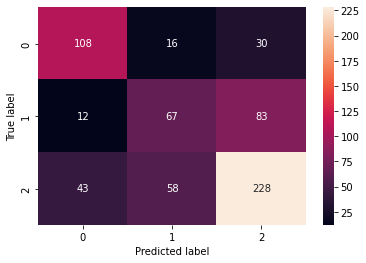

In [126]:
plot_confusion_matrix(pipeline, X_test, y_test)

In [125]:
from sklearn.metrics import f1_score

print("F1-micro:", f1_score(y_val, pipeline.predict(X_val), average="micro"))
print("F1-macro", f1_score(y_val, pipeline.predict(X_val), average="macro"))
print("F1-weighted", f1_score(y_val, pipeline.predict(X_val), average="weighted"))

F1-micro: 0.6337209302325582
F1-macro 0.59310588738502
F1-weighted 0.6282130759396376


In [124]:
#test data

print("F1-micro:", f1_score(y_test, pipeline.predict(X_test), average="micro"))
print("F1-macro", f1_score(y_test, pipeline.predict(X_test), average="macro"))
print("F1-weighted", f1_score(y_test, pipeline.predict(X_test), average="weighted"))

F1-micro: 0.6248062015503876
F1-macro 0.6014097506553706
F1-weighted 0.6209205212559706


In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pipeline.predict(X_val)))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65       100
           1       0.47      0.38      0.42       124
           2       0.71      0.71      0.71       292

    accuracy                           0.63       516
   macro avg       0.59      0.61      0.59       516
weighted avg       0.63      0.63      0.63       516



In [131]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       154
           1       0.48      0.41      0.44       162
           2       0.67      0.69      0.68       329

    accuracy                           0.62       645
   macro avg       0.60      0.60      0.60       645
weighted avg       0.62      0.62      0.62       645



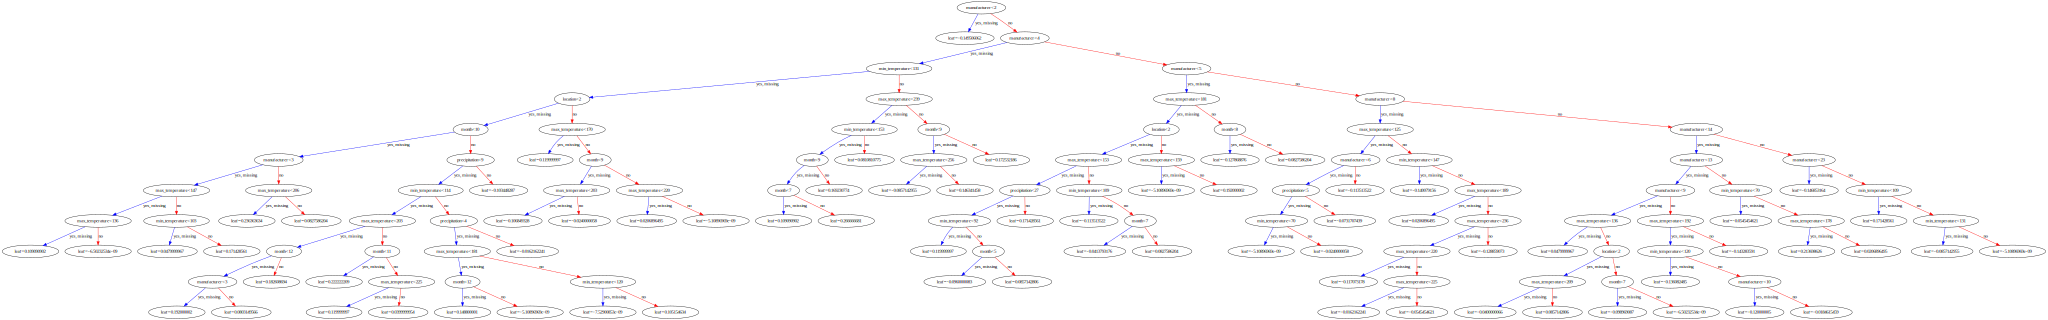

In [133]:
#시각화

import xgboost as xgb

#xgb=xgboost
xgb.to_graphviz(model, num_trees=0) 